### User settings

In [1]:
data_path = "./data/"

### Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from thermopot import materials, calculations, reactions, potentials, potential 

### Read in data and build materials

In [3]:
BaZrS3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/ternary/BaZrS3_Pnma/scan/aims.out")

BaS_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS_Fm-3m/scan/aims.out")
BaS2_calc  = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS2_C2_c/scan/aims.out")
BaS3_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P-421m/scan/aims.out")
BaS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/BaS3_P2_12_12/scan/aims.out")
Ba2S3_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Ba2S3_I4_1md/scan/aims.out")

ZrS_P4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_P4_nmm/scan/aims.out")
ZrS_Fm_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS_Fm-3m/scan/aims.out")
ZrS3_P2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS3_P2_1m/scan/aims.out")
ZrS2_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/ZrS2_P-3m1/scan/aims.out")
Zr3S4_calc = calculations.AimsCalculation(data_path+"raw_aims_files/binary/Zr3S4_Fd-3m/scan/aims.out")

Ba_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Ba_Im-3m/scan/aims.out")
Zr_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/Zr_P63_mmc/scan/aims.out")
S_calc = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S_P2_c/scan/aims.out")

S2_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S2/scan/aims.out",gas=True)
S8_calculation = calculations.AimsCalculation(data_path+"raw_aims_files/elemental/S8/scan/aims.out",gas=True)

In [4]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},data_path+"phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)

BaS = materials.Solid("BaS", {"Ba":1, "S": 1},data_path+"phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
BaS2 = materials.Solid("BaS2", {"Ba":1, "S": 2},data_path+"phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
BaS3_P4 = materials.Solid("BaS3", {"Ba":1, "S": 3},data_path+"phonopy_output/BaS3_P-421m.dat",calculation=BaS3_P4_calc)
BaS3_P2 = materials.Solid("BaS3_P2", {"Ba":1, "S": 3},data_path+"phonopy_output/BaS3_P2_12_12.dat",calculation=BaS3_P2_calc)
Ba2S3 = materials.Solid("Ba2S3", {"Ba":2, "S": 3},data_path+"phonopy_output/Ba2S3_I4_1md.dat",calculation=Ba2S3_calc)

ZrS_P4 = materials.Solid("ZrS2",{"Zr": 1,"S": 1},data_path+"phonopy_output/ZrS_P4_nmm.dat",calculation=ZrS_P4_calc)
ZrS_Fm = materials.Solid("ZrS2",{"Zr": 1,"S": 1},data_path+"phonopy_output/ZrS_Fm-3m.dat",calculation=ZrS_Fm_calc)
ZrS3_P2 = materials.Solid("ZrS2",{"Zr": 1,"S": 3},data_path+"phonopy_output/ZrS3_P2_1m.dat",calculation=ZrS3_P2_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2},data_path+"phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)
Zr3S4 = materials.Solid("ZrS2",{"Zr": 3,"S": 4},data_path+"phonopy_output/Zr3S4_Fd-3m.dat",calculation=Zr3S4_calc)

S8 = materials.IdealGas("S8",{'S':8},data_path+"nist_janaf/S8.dat",calculation=S8_calculation,zpe_lit=0.39)
S2 = materials.IdealGas("S2",{'S':2},data_path+"nist_janaf/S2.dat",calculation=S2_calculation,zpe_lit=0.047)

Ba = materials.Solid("Ba",{"Ba": 1},data_path+"phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},data_path+"phonopy_output/Zr_P63_mmc.dat",calculation=Zr_calc)
S =  materials.Solid("S",{"S":1},data_path+"phonopy_output/S_adam.dat",calculation=S_calc)

S_g = materials.Sulfur_model(S8_calculation.energy/8)  
# Note that S_g.mu is the chemical potential for a single particle of sulfur in equilibrium, including the effects
# mixing between sulfur species.

### Define temperature and pressure range

The Sulfur model is only valid for 400-1500K and 10^0-10^7 Pascal.

In [5]:
T = np.linspace(400,1500,1000) # K
P = np.array( np.logspace(0,7,1000),ndmin=2).transpose() # Pa   valid region for sulfur mode

# Elemental reactions 
## Ba + Zr + 3S --> BaZrS3 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

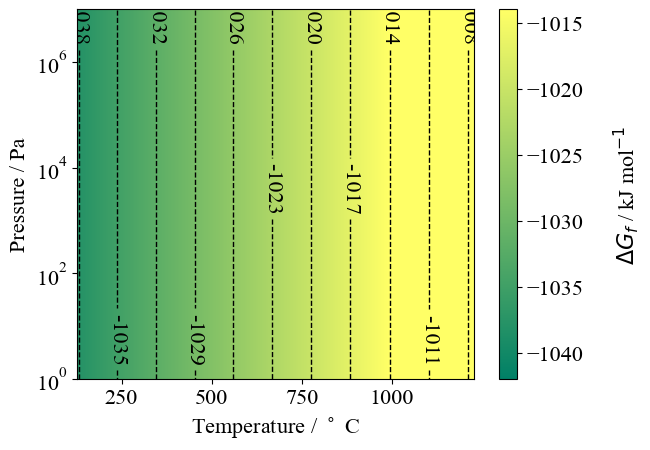

In [6]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = bulk_reaction.Dmu(xc='scan',units="kJ")
GFE.plot_TvsP(scale_range=[-1042,-1014],T_units="C")

Standard heat of formation phase diagram. This tells us that the perovskite is stable compared to the consituent elements in thier most stable forms. 

## 8Ba + 8Zr + S8 --> 8BaZrS3 

To demarcate the regions where sulfur allotropes S2 and S8 dominate, we calculate the chemical potential of S2 formation (only), S8 formation (only) and then use the wonder of Numpy to create a boolean array where S8 is more stable than S2. This can be plotted as a contour plot, with the level set at 0.5 to demarcate region of True (=1) and False (=0).

Note that our sampling of T and P space has to be quite dense to allow for a smooth line.

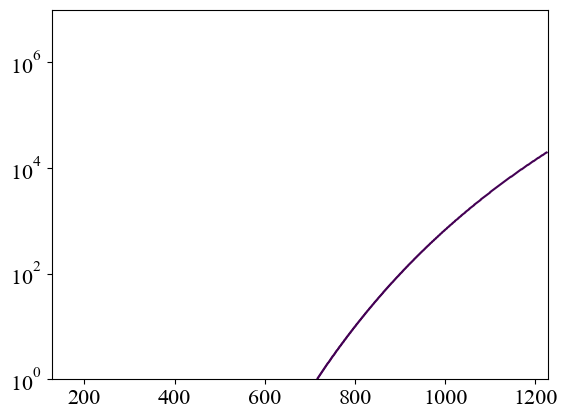

In [7]:
S2_formation = reactions.Reaction({},{S2:1},temperature=T,pressure=P)
S2_mu = S2_formation.Dmu(xc='scan',units="kJ")

S8_formation = reactions.Reaction({},{S8:1},temperature=T,pressure=P)
S8_mu = S8_formation.Dmu(xc='scan',units="kJ")


plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.yscale('log')

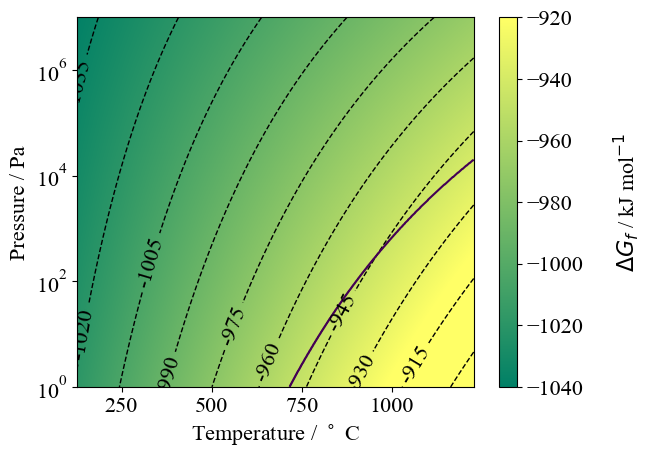

In [8]:
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1040, -920],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2Ba + 2Zr + 3S2 --> 2BaZrS3

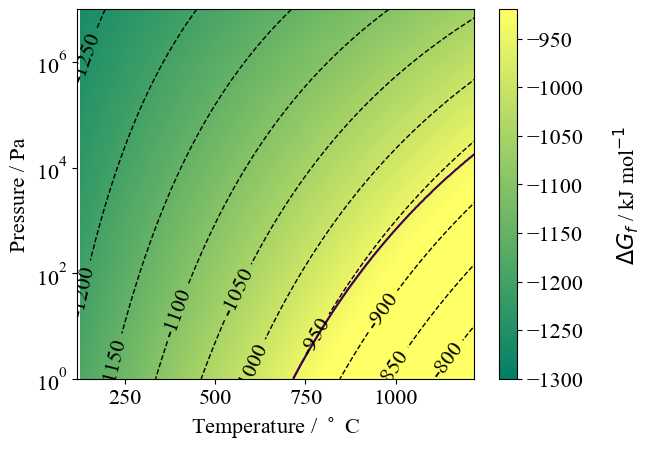

In [9]:
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1300, -920],T_units="C")
plt.xlim(117,1217)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2Ba + 2Zr + 6S_g --> 2BaZrS3

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

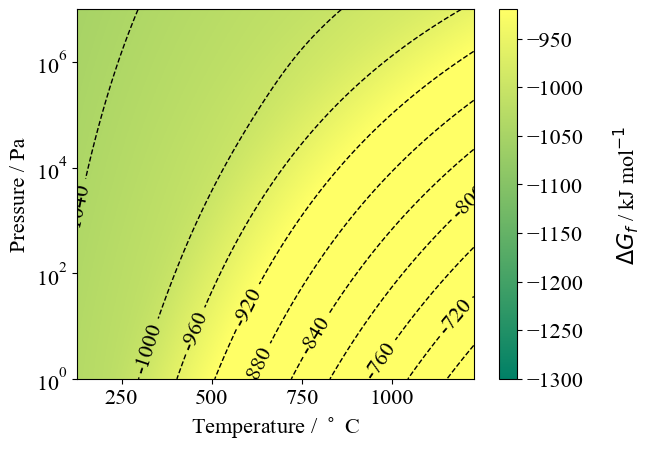

In [10]:
Sg_reaction = reactions.Reaction({Ba:1,Zr:1,S_g:3},{BaZrS3:1},temperature=T,pressure=P)
GFE = Sg_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-1300, -920],T_units="C")

# Stable binaries 
## BaS + ZrS2 --> BaZrS3 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

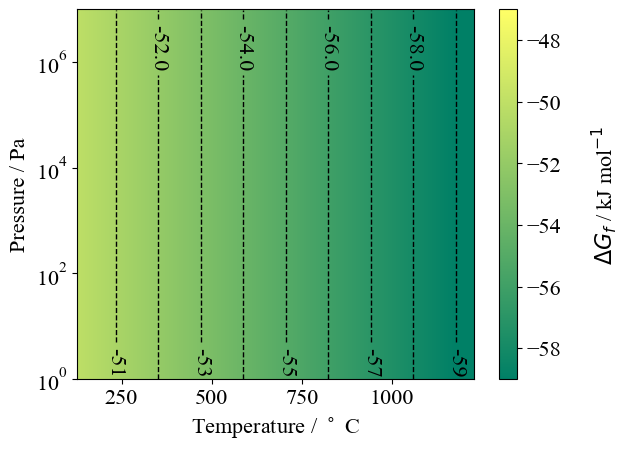

In [12]:
bulk_reaction = reactions.Reaction({BaS:1, ZrS2:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-59,-47],precision='%3.1f',T_units="C")

These are the most stable binaries. Entropy stabilises this system - the product gets more stable with temperature. 

## BaS2 + ZrS (Tetragonal) --> BaZrS3 (supp)

In [13]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_P4:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-237,-231],precision='%3.1f',T_units="C")

TypeError: Potential.plot_TvsP() got an unexpected keyword argument 'filename'

Entropy stabilises this system - the product gets more stable with temperature. For completenessm can be moved to the SI. 

## BaS2 + ZrS (cubic) --> BaZrS3 (supp)

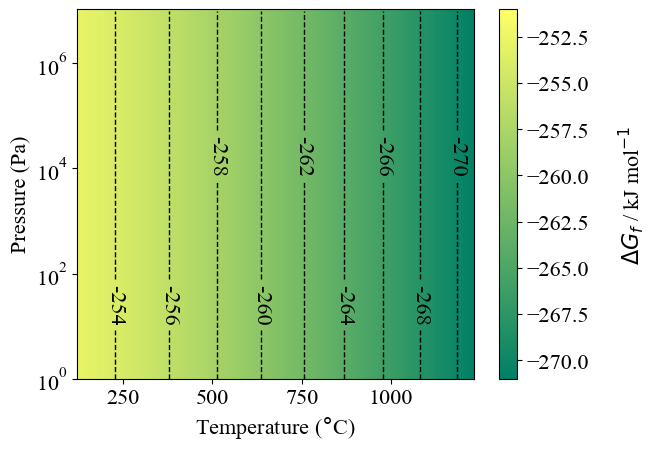

In [17]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS_Fm:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-271,-251],filename='BaS2-ZrScub-BZS.svg',T_units="C")

ZrS cubic is the more stable polymorph of the ZrS anyway so this makes sense. 
Entropy stabilises this system - the product gets more stable with temperature.  
Ofcourse this is for completeness and can be moved to the SI

## BaS3 (Tetragonal) + Zr --> BaZrS3 (supp)

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

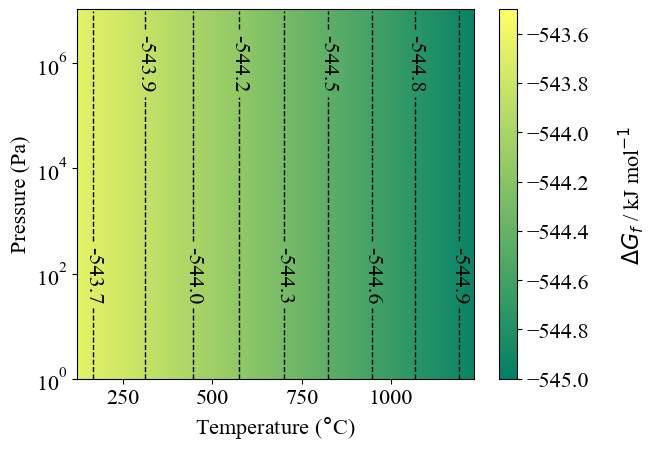

In [18]:
bulk_reaction = reactions.Reaction({BaS3_P4:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-545,-543.5],precision='%3.1f',T_units="C")

This is also the other balanced equation possible from the binary. Only one binary (BaS3) in the reactants in this case. Entropy stabilises this system - the product gets more stable with temperature. This is for completeness, can be moved to the SI

## BaS3 (Tetragonal) + Zr --> BaZrS3 (supp)

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

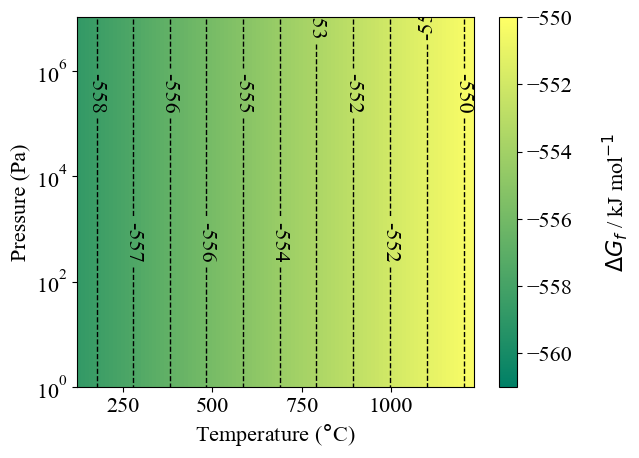

In [19]:
bulk_reaction = reactions.Reaction({BaS3_P2:1, Zr:1},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-561,-550],T_units="C")

BaS3 has two polymorphs. Here for completeness. This is interesting because this is the only reaction that does not stabilize with entropy. I wonder if it is because this BaS3 polymorph is low in symmetry to begin with (orthorhombic). I see this as further motivation to plot the different components of the GFE...

## BaS + Zr + 2S --> BaZrS3 (supp)

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

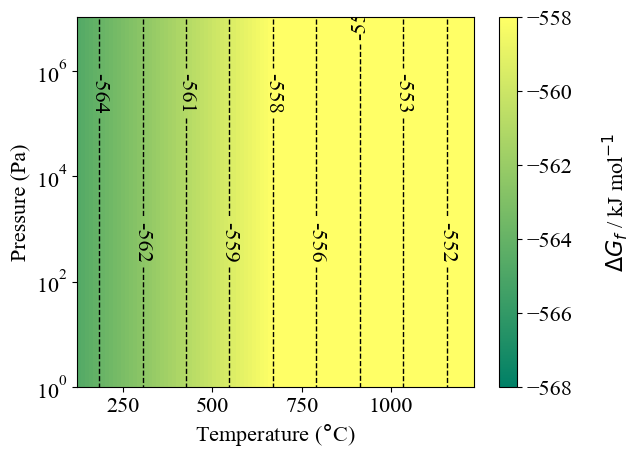

In [20]:
bulk_reaction = reactions.Reaction({BaS:1,Zr:1,S:2},{BaZrS3:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-568,-558],T_units="C")

## BaS + S2 + Zr --> BaZrS3 (supp)

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

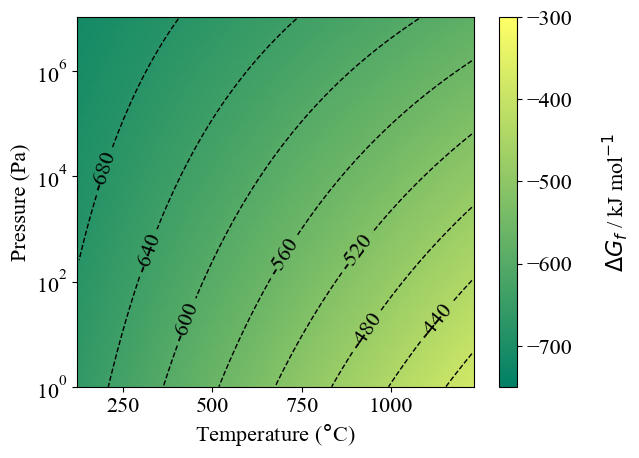

In [21]:
S2_reaction = reactions.Reaction({BaS:1,S2:1,Zr:1},{BaZrS3:1}, temperature=T, pressure=P,fu=1)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-750, -300],T_units="C")

## 8BaS + 2S8 + 8Zr --> 8BaZrS3 (supp)

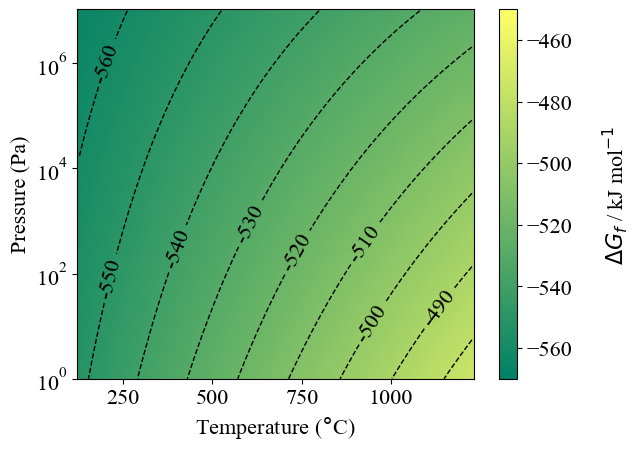

In [20]:
S8_reaction = reactions.Reaction({BaS:8,S8:2,Zr:8},{BaZrS3:8}, temperature=T, pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-570, -450],filename='BaS-S8-Zr--BZS.svg',T_units="C")

## BaS + 2S_g + Zr --> BaZrS3 (supp)

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

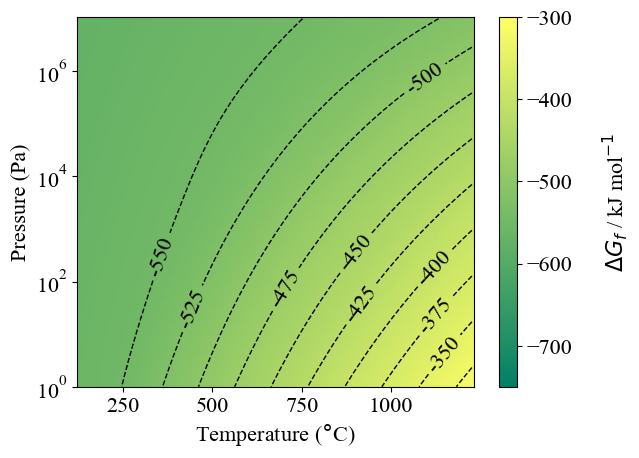

In [16]:
S2_reaction = reactions.Reaction({BaS:1,S_g:2,Zr:1},{BaZrS3:1}, temperature=T, pressure=P,fu=1)
GFE = S2_reaction.Dmu(units="kJ",xc='scan')
GFE.plot_TvsP(scale_range=[-750, -300],T_units="C")

## 2BaS + 2ZrS3 --> 2BaZrS3 + S2 

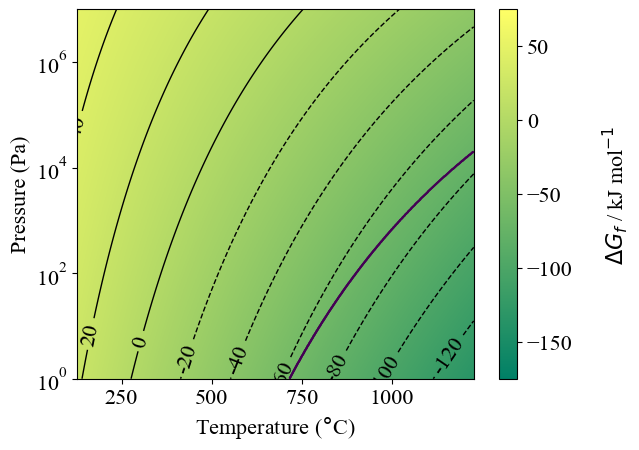

In [44]:
bulk_reaction = reactions.Reaction({BaS:2, ZrS3_P2:2},{BaZrS3:2, S2:1},temperature=T, pressure=P, fu=2)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-175,75],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS + 8ZrS3 --> 8BaZrS3 + S8 

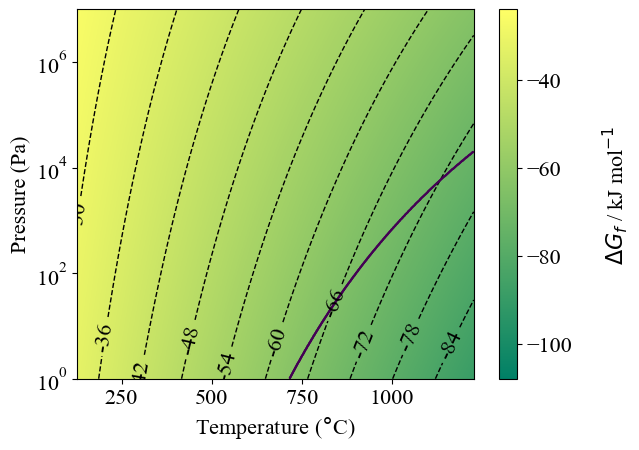

In [45]:
bulk_reaction = reactions.Reaction({BaS:8, ZrS3_P2:8},{BaZrS3:8, S8:1},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-108,-24],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS + 8ZrS3 --> 8BaZrS3 + 8S_g 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

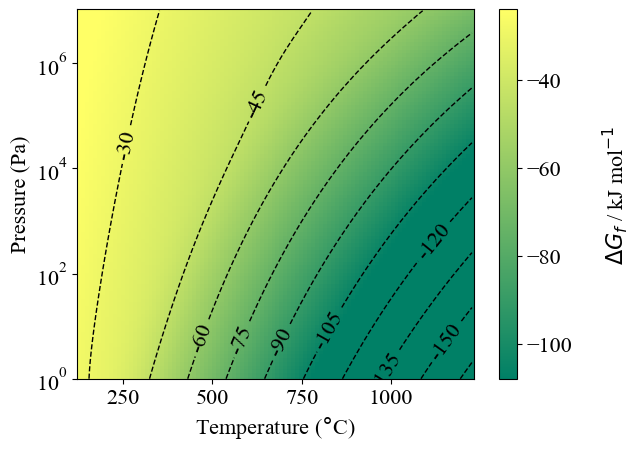

In [24]:
bulk_reaction = reactions.Reaction({BaS:8, ZrS3_P2:8},{BaZrS3:8, S_g:8},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-108,-24],T_units="C")

## BaS2 + ZrS3 --> BaZrS3 + S2

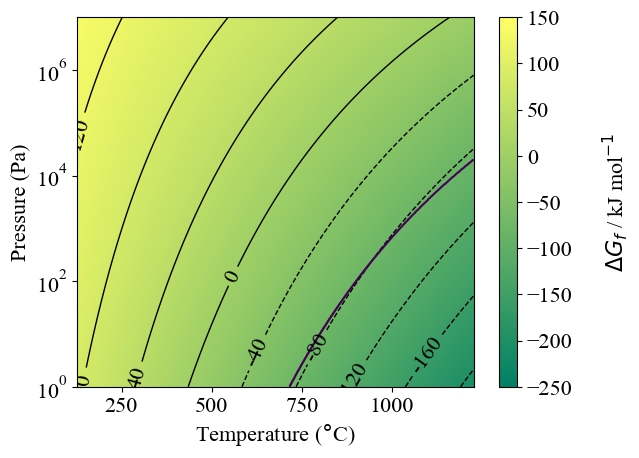

In [47]:
bulk_reaction = reactions.Reaction({BaS2:1, ZrS3_P2:1},{BaZrS3:1, S2:1},temperature=T, pressure=P, fu=1)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-250,150],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS2 + 8ZrS3 --> 8BaZrS3 + 2S8

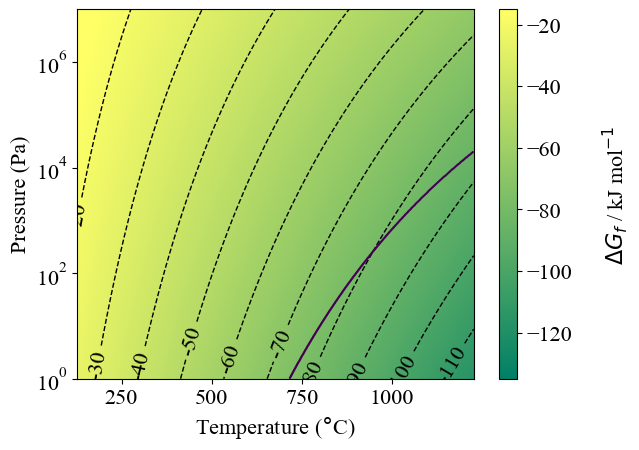

In [49]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S8:2},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-135,-15],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS2 + 8ZrS3 --> 8BaZrS3 + 16S_g

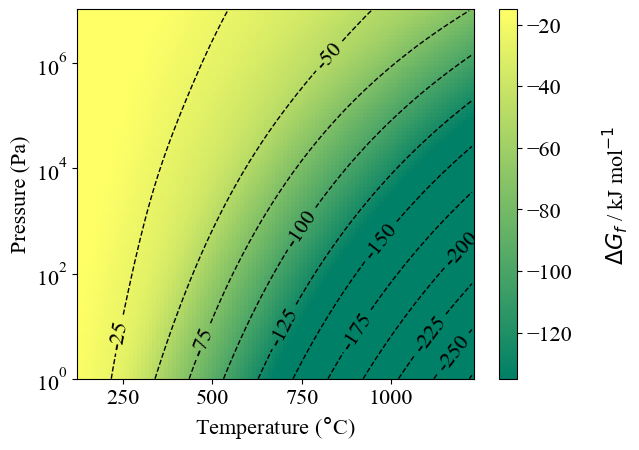

In [29]:
bulk_reaction = reactions.Reaction({BaS2:8, ZrS3_P2:8},{BaZrS3:8, S_g:16},temperature=T, pressure=P, fu=8)
GFE = bulk_reaction.Dmu(units="kJ",xc="scan")
GFE.plot_TvsP(scale_range=[-135,-15],filename='BaS2-ZrS3--BZS-S8.svg',T_units="C",gas_phase="S8")

## 2BaS3 + 2ZrS3 --> 2BaZrS3 +  3S_2

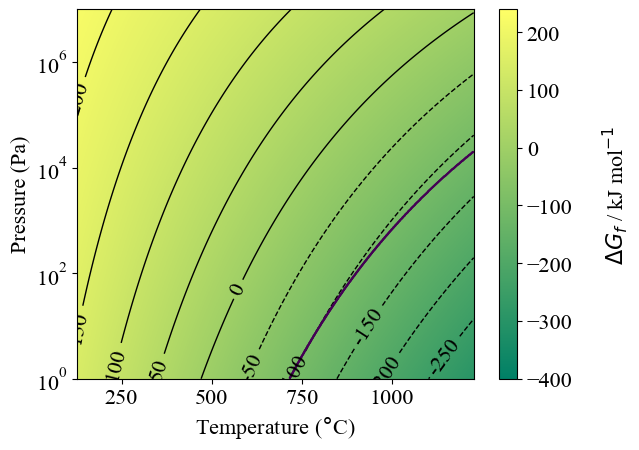

In [50]:
bulk_reaction = reactions.Reaction({BaS3_P4:2,ZrS3_P2:2},{BaZrS3:2,S2:3},temperature=T, pressure=P, fu=2)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE_4310.plot_TvsP(scale_range=[-400,240],T_units="C")
#plt.vlines(575,1E-1,5,color='blue',linestyle='--')
#plt.scatter(575,2,color='w',edgecolor='blue',marker='v',zorder=23)
#plt.scatter(575,5,color='w',edgecolor='blue',marker='^',zorder=23)
#plt.scatter(x=554,y=1,color='orange',marker='v',zorder=26)
#plt.scatter(x=554,y=1.7*10**1,color='orange',marker='^',zorder=27)
#plt.axvline(x=554, ymin=0.30,ymax=0.42, color="orange",linewidth='2',zorder=28)
#plt.scatter(x=575,y=0.74*10**5,zorder=22,color='w',marker='^',edgecolors='b')
#plt.scatter(x=575,y=0.40*10**5,zorder=22,color='w',marker='v',edgecolors='b')
#plt.vlines(575,0.74*10**5,0.2*10**5,color='blue',zorder=21)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])


## 8BaS3 + 8ZrS3 --> 8BaZrS3 +  3S8

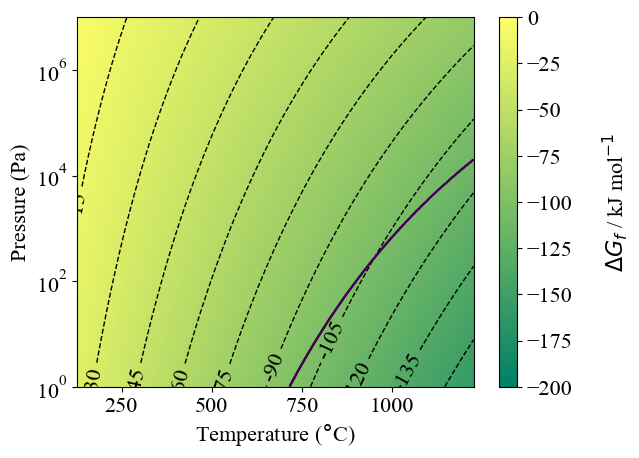

In [51]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS3_P2:8},{BaZrS3:8,S8:3},temperature=T, pressure=P, fu=8)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-200,0],T_units="C")
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 2BaS3 + 2ZrS3 --> 2BaZrS3 +  6S_g

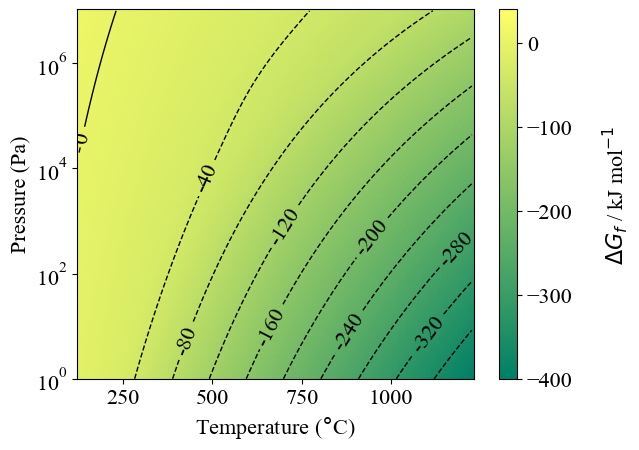

In [30]:
bulk_reaction = reactions.Reaction({BaS3_P4:2,ZrS3_P2:2},{BaZrS3:2,S_g:6},temperature=T, pressure=P, fu=2)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
plt = GFE_4310.plot_TvsP(scale_range=[-400,40],T_units="C")

## 2BaS2 + 2ZrS2 --> 2BaZrS3 +  S2 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

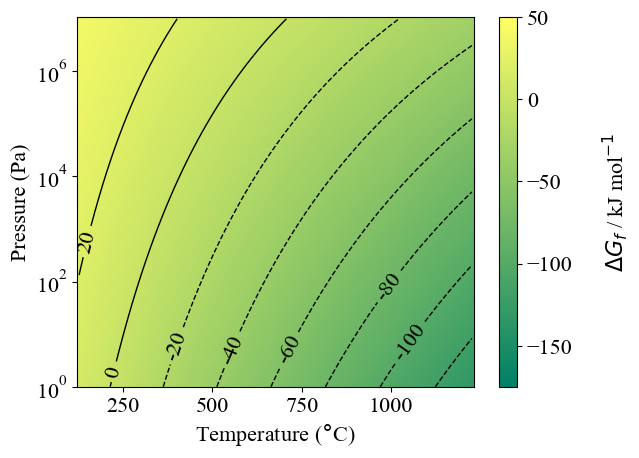

In [34]:
bulk_reaction = reactions.Reaction({BaS2:2,ZrS2:2},{BaZrS3:2,S2:1},temperature=T, pressure=P, fu=2)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-175,50],T_units="C")

## 8BaS2 + 8ZrS2 --> 8BaZrS3 +  S8

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

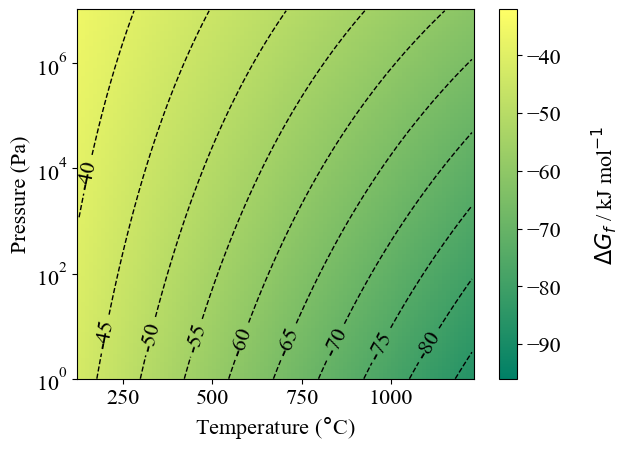

In [35]:
bulk_reaction = reactions.Reaction({BaS2:8,ZrS2:8},{BaZrS3:8,S8:1},temperature=T, pressure=P, fu=8)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-96,-32],T_units="C")

## BaS3 + ZrS2 --> BaZrS3 +  S2

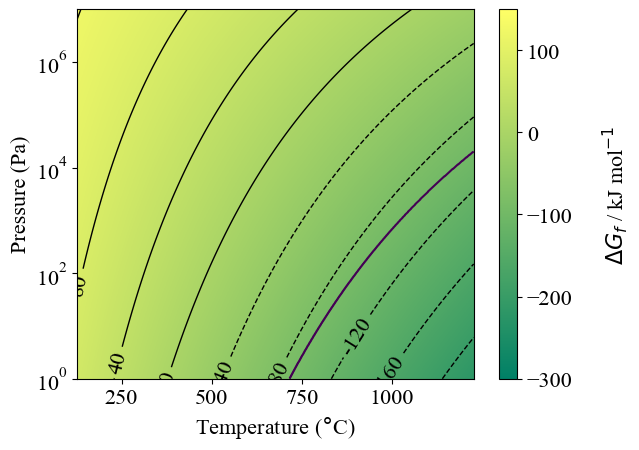

In [53]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaZrS3:1,S2:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

## 8BaS3 + 8ZrS2 --> 8BaZrS3 +  2S8 

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

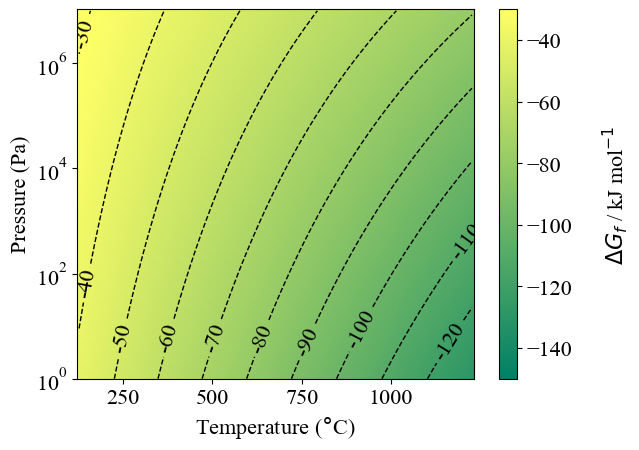

In [38]:
bulk_reaction = reactions.Reaction({BaS3_P4:8,ZrS2:8},{BaZrS3:8,S8:2},temperature=T, pressure=P, fu=8)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-150,-30],T_units="C")

## BaS3 + ZrS2 --> BaZrS3 +  2S_g

<module 'matplotlib.pyplot' from '/Users/mynf8/miniconda3/lib/python3.10/site-packages/matplotlib/pyplot.py'>

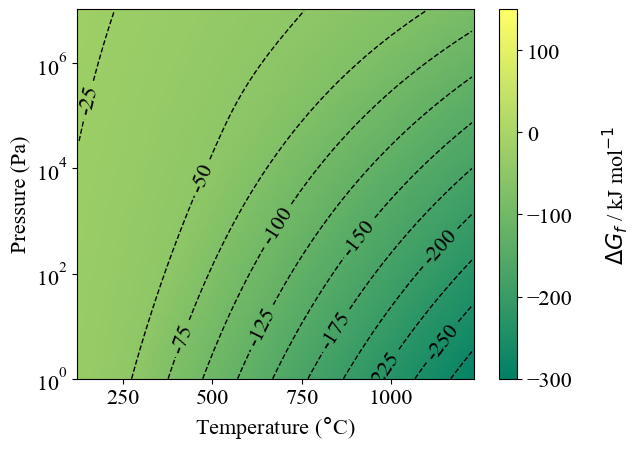

In [36]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaZrS3:1,S_g:2},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-300,150],T_units="C")

### BaS3 + ZrS2 --> BaS2 + ZrS3

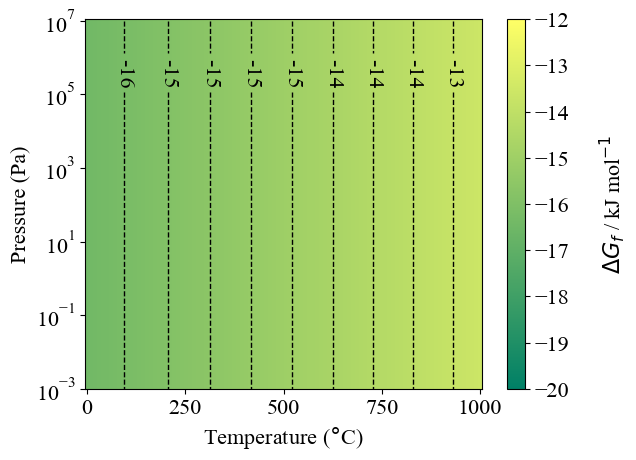

In [60]:
bulk_reaction = reactions.Reaction({BaS3_P4:1,ZrS2:1},{BaS2:1,ZrS3_P2:1},temperature=T, pressure=P, fu=1)
GFE_4310 = bulk_reaction.Dmu(units="kJ",xc='scan')
GFE_4310.plot_TvsP(scale_range=[-20,-12],filename='BaS3-ZrS2.svg',T_units="C")

## Ba-S system
### with S2 
2Ba +  3S2 --> 2BaS  + 2S2     
2Ba +  3S2 --> 2BaS2 +  S2     
2Ba +  3S2 --> 2BaS3 (P4)     
2Ba +  3S2 --> 2BaS3 (P2)               

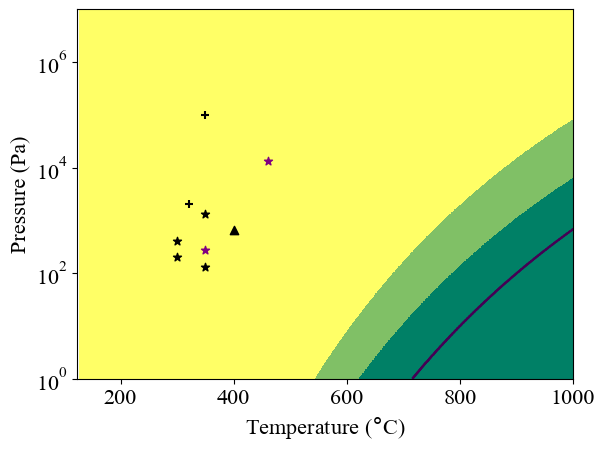

In [54]:
BaS_reaction = reactions.Reaction({Ba:4,S2:6},{BaS:4,S2:4},temperature=T,pressure=P,fu=4)
BaS2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS2:4,S2:2},temperature=T,pressure=P,fu=4)
BaS3_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P4:4},temperature=T,pressure=P,fu=4)
BaS3_P2_reaction = reactions.Reaction({Ba:4,S2:6},{BaS3_P2:4},temperature=T,pressure=P,fu=4)
#BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])
#BaS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])
#BaS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])
#BaS3_P2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1])

BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_P2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3"],log_scale=True,T_units="C",melting_point=True)
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')
plt.scatter(x=350,y=2.7*10**2,zorder=23,marker='*',color='purple')   # BaS3
plt.scatter(x=350,y=13.3*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=300,y=2*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=350,y=1.3*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=300,y=4*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=460,y=133*10**2,zorder=23,marker='*',color='purple')   
plt.scatter(x=400,y=6.7*10**2,zorder=23,marker='^',color='black')    # BaS2
plt.scatter(x=350,y=1000*10**2,zorder=23,marker='+',color='black')   # BaS
plt.scatter(x=320,y=20*10**2,zorder=23,marker='+',color='black')
plt.xlim(123,1000)
plt.ylim(10**0,10**7)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])

Yellow Purple is BaS, green is BaS2 and dark green is BaS3

### with S8
8Ba +  3S8 --> 8BaS   +  2S8        
8Ba +  3S8 --> 8BaS2  +  S8       
8Ba +  3S8 --> 8BaS3         
8Ba +  3S8 --> 8BaS3           

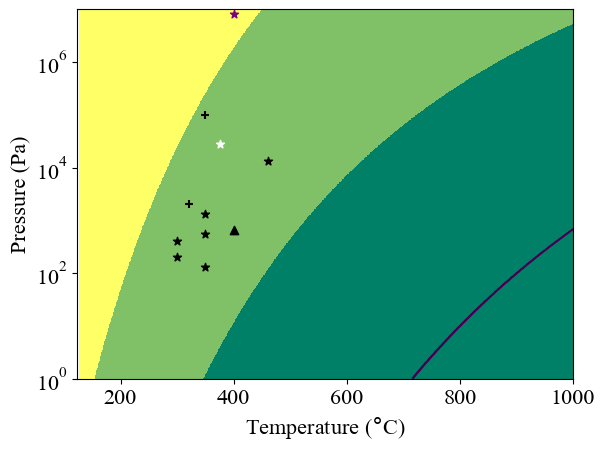

In [55]:
BaS_reaction = reactions.Reaction({Ba:8,S8:3},{BaS:8,S8:2},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS2:8,S8:1},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S8:3},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
#BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
#BaS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
#BaS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
#BaS3_P2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],log_scale=True,T_units="C",melting_point=True)
plt.scatter(x=400,y=8*10**6,zorder=23,color='purple',marker='*')
plt.scatter(x=375,y=0.28*10**5,zorder=23,color='white',marker='*')
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')
plt.scatter(x=350,y=2*2.7*10**2,zorder=23,marker='*',color='black')   # BaS3
plt.scatter(x=350,y=13.3*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=300,y=2*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=350,y=1.3*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=300,y=4*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=460,y=133*10**2,zorder=23,marker='*',color='black')   
plt.scatter(x=400,y=6.7*10**2,zorder=23,marker='^',color='black')    # BaS2
plt.scatter(x=350,y=1000*10**2,zorder=23,marker='+',color='black')   # BaS
plt.scatter(x=320,y=20*10**2,zorder=23,marker='+',color='black')
plt.xlim(123,1000)
plt.ylim(10**0,10**7)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
# 11 samples but one is repeat of conditions, and in one pressure was not measured.

### with Sulfur model
8Ba +  24S_g --> 8BaS   +  16S_g        
8Ba +  24S_g --> 8BaS2  +  8S_g       
8Ba +  24S_g --> 8BaS3         
8Ba +  24S_g --> 8BaS3     

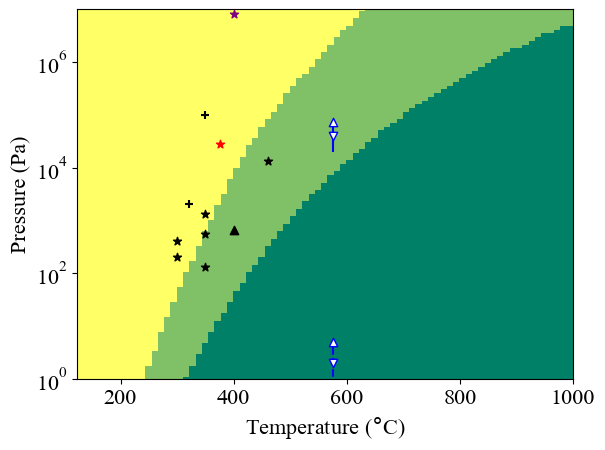

In [40]:
BaS_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS:8,S_g:16},temperature=T,pressure=P,fu=8)
BaS2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS2:8,S_g:8},temperature=T,pressure=P,fu=8)
BaS3_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P4:8},temperature=T,pressure=P,fu=8)
BaS3_P2_reaction = reactions.Reaction({Ba:8,S_g:24},{BaS3_P2:8},temperature=T,pressure=P,fu=8)
#BaS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
#BaS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
#BaS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
#BaS3_P2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3])
BaS_system = potentials.Potentials(BaS_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS2_reaction.Dmu(units="kJ",xc='scan',T=T,P=P),BaS3_reaction.Dmu(units="kJ",xc='scan',T=T,P=P))
plt = BaS_system.plot_TvsP(material_labels=["BaS","BaS2","BaS3","BaS3_P2"],log_scale=True,T_units="C")
plt.xlim(123,1000)
plt.ylim(10**0,10**7)

plt.scatter(x=400,y=8*10**6,zorder=23,color='purple',marker='*')
plt.scatter(x=375,y=0.28*10**5,zorder=23,color='red',marker='*')
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')
plt.scatter(x=350,y=2*2.7*10**2,zorder=23,marker='*',color='black')   # BaS3
plt.scatter(x=350,y=13.3*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=300,y=2*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=350,y=1.3*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=300,y=4*10**2,zorder=23,marker='*',color='black')
plt.scatter(x=460,y=133*10**2,zorder=23,marker='*',color='black')   
plt.scatter(x=400,y=6.7*10**2,zorder=23,marker='^',color='black')    # BaS2
plt.scatter(x=350,y=1000*10**2,zorder=23,marker='+',color='black')   # BaS
plt.scatter(x=320,y=20*10**2,zorder=23,marker='+',color='black')

plt.vlines(575,1E-1,5,color='blue',linestyle='--')
plt.scatter(575,2,color='w',edgecolor='blue',marker='v',zorder=23)
plt.scatter(575,5,color='w',edgecolor='blue',marker='^',zorder=23)
plt.scatter(x=575,y=0.74*10**5,zorder=22,color='w',marker='^',edgecolors='b')
plt.scatter(x=575,y=0.40*10**5,zorder=22,color='w',marker='v',edgecolors='b')
plt.vlines(575,0.74*10**5,0.2*10**5,color='blue',zorder=21)


## Zr-S system

### with S2
2Zr + 3S2 --> 2ZrS + 2S2      
2Zr + 3S2 --> 2ZrS2 + S2               
2Zr + 3S2 --> 2ZrS3 

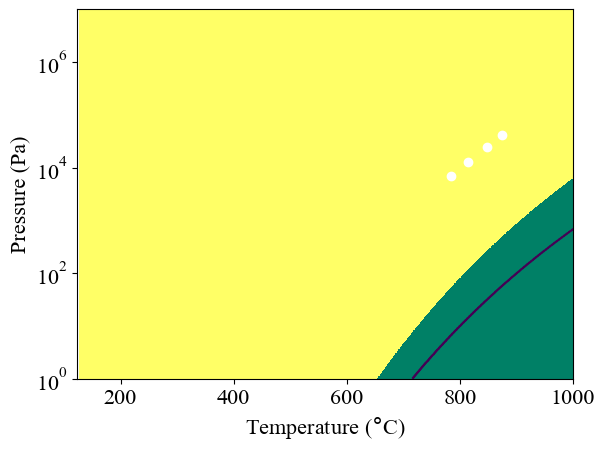

In [56]:
ZrS_reaction = reactions.Reaction({Zr:2,S2:3},{ZrS_P4:2,S2:2},temperature=T,pressure=P,fu=2)
ZrS2_reaction = reactions.Reaction({Zr:2,S2:3},{ZrS2:2,S2:1},temperature=T,pressure=P,fu=2)
ZrS3_reaction = reactions.Reaction({Zr:2,S2:3},{ZrS3_P2:2},temperature=T,pressure=P,fu=2)
#ZrS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-4,-1],precision="%.2f")
#ZrS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
#ZrS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-8,-1],precision="%.2f")
ZrS_system = potentials.Potentials(ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C",melting_point=True)
plt.scatter([785,814,847,874],[7E3,1.3E4,2.4E4,4.1E4],color='w')
plt.xlim(123,1000)
plt.ylim(10**0,10**7)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')

### with S8
8Zr + 3S8 --> 8ZrS + 2S8      
8Zr + 3S8 --> 8ZrS2 + S8               
8Zr + 3S8 --> 8ZrS3      


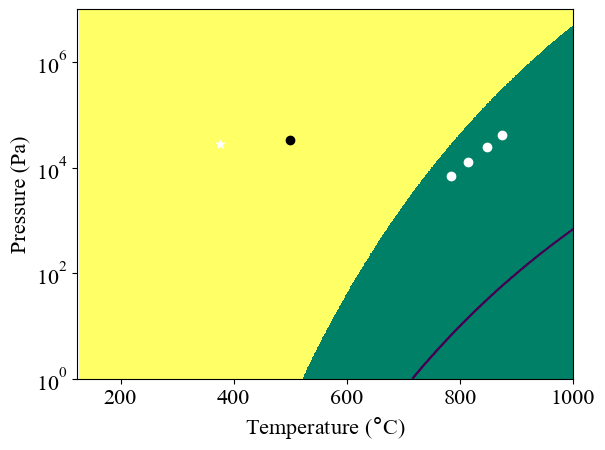

In [58]:
ZrS_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS_P4:8,S8:2},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS2:8,S8:1},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S8:3},{ZrS3_P2:8},temperature=T,pressure=P,fu=8)
#ZrS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-4,-1],precision="%.2f")
#ZrS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
#ZrS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
ZrS_system = potentials.Potentials(ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C",melting_point=True)
plt.scatter([785,814,847,874],[7E3,1.3E4,2.4E4,4.1E4],color='w',zorder=34)
plt.scatter(500,0.33E5,color='black',zorder=43)
plt.scatter(x=375,y=0.28*10**5,zorder=23,color='white',marker='*')
plt.xlim(123,1000)
plt.ylim(10**0,10**7)
plt.contour(T-273,P.flatten(),S8_mu.potential <= S2_mu.potential*4, levels=[.5])
#plt.hlines([2,5,0.1],823,863,color='red')
#plt.vlines([823,863],1E-1,5,color='red')

### with S_g
8Zr + 24S_g --> 8ZrS + 16S_g   
8Zr + 24S_g --> 8ZrS2 + 8S_g              
8Zr + 24S_g --> 8ZrS3      


(1, 10000000)

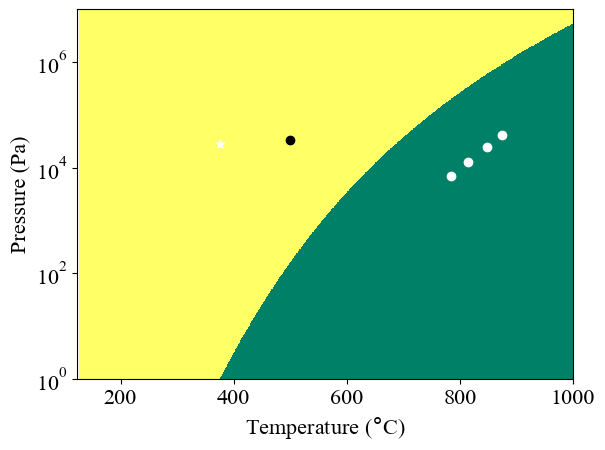

In [59]:
ZrS_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS_P4:8,S_g:16},temperature=T,pressure=P,fu=8)
ZrS2_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS2:8,S_g:8},temperature=T,pressure=P,fu=8)
ZrS3_reaction = reactions.Reaction({Zr:8,S_g:24},{ZrS3_P2:8},temperature=T,pressure=P,fu=8)
#ZrS_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-4,-1],precision="%.2f")
#ZrS2_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
#ZrS3_reaction.Dmu(xc='scan').plot_TvsP(scale_range=[-5,-3],precision="%.2f")
ZrS_system = potentials.Potentials(ZrS_reaction.Dmu(xc='scan'),ZrS2_reaction.Dmu(xc='scan'),ZrS3_reaction.Dmu(xc='scan'))
plt = ZrS_system.plot_TvsP(material_labels=["ZrS","ZrS2","ZrS3"],T_units="C",melting_point=True)
plt.scatter([785,814,847,874],[7E3,1.3E4,2.4E4,4.1E4],color='w',zorder=34)
plt.scatter(500,0.33E5,color='black',zorder=43)
plt.scatter(x=375,y=0.28*10**5,zorder=23,color='white',marker='*')
plt.xlim(123,1000)
plt.ylim(10**0,10**7)